In [2]:
# Adds link to the scripts folder
import sys
import os
sys.path.append("../../scripts/")
import matplotlib.pyplot as plt
import numpy as np

from trajectory import Trajectory, load_trajectory_dict
from hivevo.patients import Patient
import filenames
import copy
from activity import get_average_activity

# Activity plots

## Functions

Format of the dictionnaries : trajectories[region][rev/non_rev/syn/non_syn]

In [3]:
def make_activity_dict(min_freq=0.0, normalize=True):
    regions = ["env", "pol", "gag"]
    activities = {}
    for region in regions:
        tmp_dict = {}
        for traj_type in ["rev", "non_rev", "syn", "non_syn", "all"]:
            tmp_traj = [traj for traj in trajectories[region][traj_type] if np.sum(traj.frequencies>min_freq, dtype=bool)]
            tmp_dict[traj_type] = get_average_activity(tmp_traj, True)
        activities[region] = tmp_dict

    time_bins = activities["env"]["rev"]["time_bins"]
    
    return time_bins, activities


def plot_activity(time_bins, activities, savefig=False, fontsize=16):
    regions = ["env", "pol", "gag"]
    colors = ["C0","C1","C2"]
    plt.figure(figsize=(10,8))
    for ii, region in enumerate(regions):
        plt.plot(time_bins, activities[region]["syn"]["active"], '-', color=colors[ii], label="syn "+region)
        plt.plot(time_bins, activities[region]["non_syn"]["active"], '--', color=colors[ii], label="non_syn " + region)
    plt.grid()
    plt.xlabel("Time [days]", fontsize=fontsize)
    plt.ylabel("Ratio of active trajectories", fontsize=fontsize)
    plt.legend(fontsize=fontsize)
    plt.ylim([-0.05, 1.05])
    plt.tight_layout()
    
    if savefig:
        plt.savefig(savefig+".pdf", format="pdf")
    plt.show()

# Intro plot

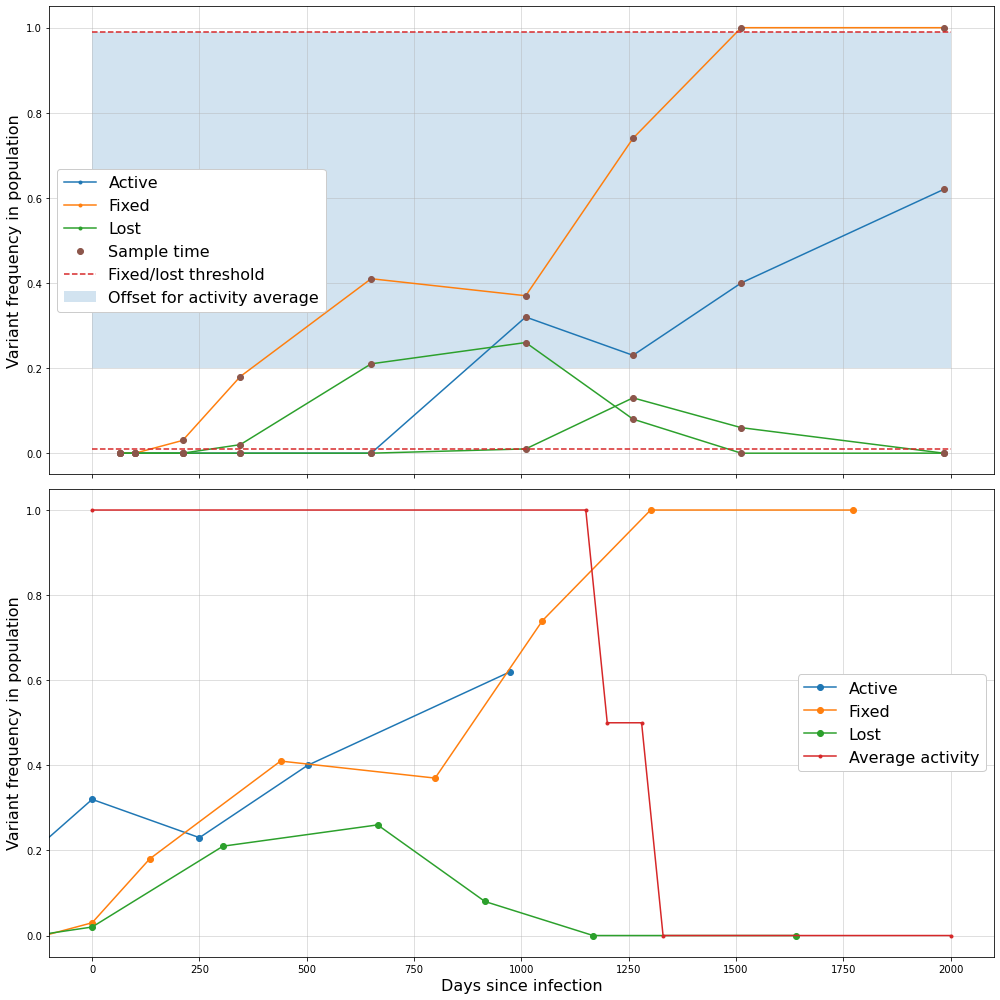

In [40]:
traj = {}
traj["lost"] = [0, 0, 0, 0.02, 0.21, 0.26, 0.08, 0, 0]
traj["fixed"] = [0, 0, 0.03, 0.18, 0.41, 0.37, 0.74, 1, 1]
traj["active"] = [0, 0, 0, 0, 0, 0.32, 0.23, 0.4, 0.62]
traj["lost2"] = [0, 0, 0, 0, 0.0, 0.01, 0.13, 0.06, 0]

time = [64, 100, 211, 345, 650, 1010, 1260, 1512, 1984]


fontsize=16
grid_alpha = 0.5
colors = ["C0","C1","C2","C3", "C4","C5"]
markersize=12
fill_alpha = 0.2

fig, axs = plt.subplots(ncols=1, nrows=2, figsize=(14,14), sharex=True)

# Top plot
active, = axs[0].plot(time, traj["active"], '.-', label=traj_type, color=colors[0])
fixed, = axs[0].plot(time, traj["fixed"], '.-', label=traj_type, color=colors[1])
lost, = axs[0].plot(time, traj["lost"], '.-', label=traj_type, color=colors[2])
axs[0].plot(time, traj["lost2"], '.-', label=traj_type, color=colors[2])
for ii,traj_type in enumerate(["active", "lost", "fixed", "lost2"]):
    sample, = axs[0].plot(time, traj[traj_type], '.', color=colors[5], markersize=markersize)

threshold, = axs[0].plot([0, 2000],[0.01,0.01], '--', color=colors[3])
axs[0].plot([0, 2000],[0.99,0.99], '--', color=colors[3])
fill = axs[0].fill_between([0, 2000], [0.2, 0.2], [0.99, 0.99], alpha=fill_alpha)

axs[0].set_ylabel("Variant frequency in population", fontsize=fontsize)
axs[0].grid(alpha=grid_alpha)
axs[0].legend([active, fixed, lost, sample, threshold, fill],["Active", "Fixed", "Lost", "Sample time", "Fixed/lost threshold", "Offset for activity average"],fontsize=fontsize, framealpha=1)

# Bottom plot

active, = axs[1].plot(np.array(time)-time[5], traj["active"], '.-', label=traj_type, color=colors[0], markersize=markersize)
fixed, = axs[1].plot(np.array(time)-time[2], traj["fixed"], '.-', label=traj_type, color=colors[1], markersize=markersize)
lost, = axs[1].plot(np.array(time)-time[3], traj["lost"], '.-', label=traj_type, color=colors[2], markersize=markersize)
mean, = axs[1].plot([0, 1150, 1200, 1280, 1330, 2000], [1, 1, 0.5, 0.5, 0.0, 0], '.-', label=traj_type, color=colors[3])

axs[1].set_ylabel("Variant frequency in population", fontsize=fontsize)
axs[1].set_xlabel("Days since infection", fontsize=fontsize)
axs[1].grid(alpha=grid_alpha)
axs[1].set_xlim([-100, 2100])
axs[1].legend([active, fixed, lost, mean], ["Active", "Fixed", "Lost", "Average activity"], fontsize=fontsize, framealpha=1)

plt.tight_layout()
plt.show()

# In subplot

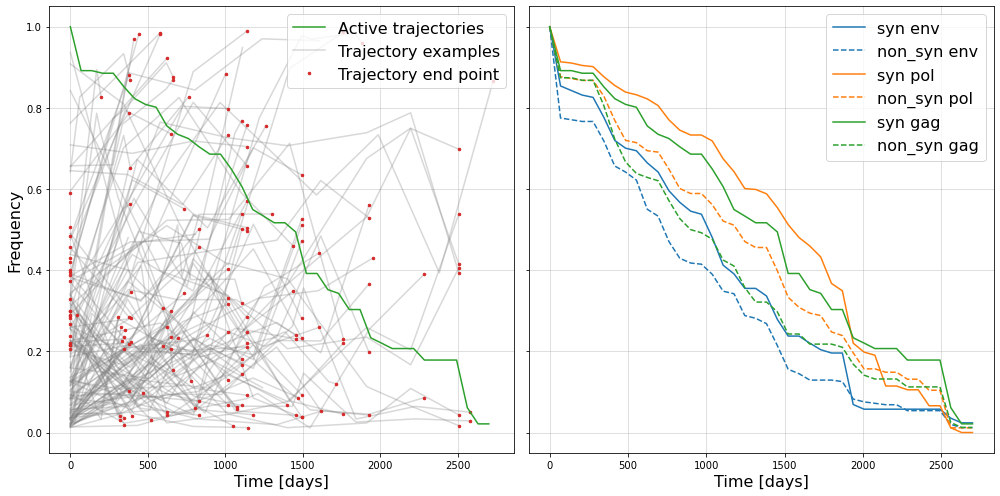

In [67]:
regions = ["env", "pol", "gag"]
colors = ["C0","C1","C2","C7","C3"]
explanation_region = "gag"
explanation_type = "syn"
explanation_color = colors[2]
explanation_marker_size = 5
explanation_traj_alpha = 0.3
grid_alpha = 0.5
fontsize = 16
min_freq = 0.2

fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(14,7), sharey=True)

# Explanation plot
for traj in trajectories[explanation_region][explanation_type]:
    if np.sum(traj.frequencies>min_freq, dtype=bool):
        line_traj, = axs[0].plot(traj.t, traj.frequencies, '-', color=colors[3], alpha=explanation_traj_alpha)
for traj in trajectories[explanation_region][explanation_type]:
    if np.sum(traj.frequencies>min_freq, dtype=bool):
        markers, = axs[0].plot(traj.t[-1], traj.frequencies[-1], '.', color=colors[4], markersize=explanation_marker_size)
line_average, = axs[0].plot(time_bins, activities[explanation_region][explanation_type]["active"], '-', color=explanation_color)
axs[0].legend([line_average, line_traj, markers], ["Active trajectories","Trajectory examples", "Trajectory end point"], loc="upper right", fontsize=fontsize)
axs[0].grid(alpha=grid_alpha)
axs[0].set_xlabel("Time [days]", fontsize=fontsize)
axs[0].set_ylabel("Frequency", fontsize=fontsize)

# Activity plot
for ii, region in enumerate(regions):
    axs[1].plot(time_bins, activities[region]["syn"]["active"], '-', color=colors[ii], label="syn "+region)
    axs[1].plot(time_bins, activities[region]["non_syn"]["active"], '--', color=colors[ii], label="non_syn " + region)
axs[1].grid(alpha=grid_alpha)
axs[1].set_xlabel("Time [days]", fontsize=fontsize)
axs[1].legend(fontsize=fontsize)


plt.tight_layout()
plt.savefig("Multi_activity.pdf", format="pdf")
plt.show()
